In [6]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv("temperatures.csv")

In [3]:
# Display basic info
print(df.head())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [4]:
print(df.columns)

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [5]:
df_melted = df.melt(id_vars=['YEAR'], value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                     var_name='Month', value_name='Temperature')

In [7]:
df_melted['Month'] = pd.to_datetime(df_melted['Month'], format='%b').dt.month

In [8]:
X = df_melted[['Month']]
y = df_melted['Temperature']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
predicted_df = pd.DataFrame({'Month': X_test['Month'].values, 'Predicted Temperature': y_pred})
predicted_df = predicted_df.sort_values(by='Month')
print("\nPredicted Month-wise Temperatures:")
print(predicted_df.to_string(index=False))


Predicted Month-wise Temperatures:
 Month  Predicted Temperature
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     1              28.920756
     2              28.961105
     2              28.961105
     2              28.961105
     2              28.961105
     2              28.961105
     2              28.961105
     2              28.961105
    

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Square Score: {r2}")

Mean Squared Error: 9.999806682283976
Mean Absolute Error: 2.705271869781447
R-Square Score: -0.005573628993982949


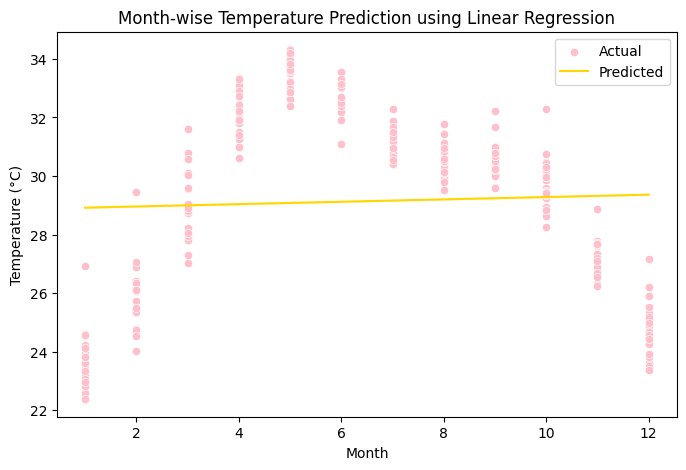

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Month'], y=y_test, color='pink', label='Actual')
sns.lineplot(x=X_test['Month'], y=y_pred, color='gold', label='Predicted')
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Month-wise Temperature Prediction using Linear Regression")
plt.legend()
plt.show()